In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers,models


In [9]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    seed=123,  # Ensure reproducibility
    image_size=(256, 256),  # Resize all images to 256x256
    batch_size=32  # Number of images per batch
)

Found 2152 files belonging to 3 classes.


In [10]:
cln = df.class_names

In [11]:
for i,l in df.take(1): #to take 1 batch
    print(i.shape) # to find the shape of the batch(elements,size,size,rgb)
    print(l.numpy())#label of elements inside the batch


(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


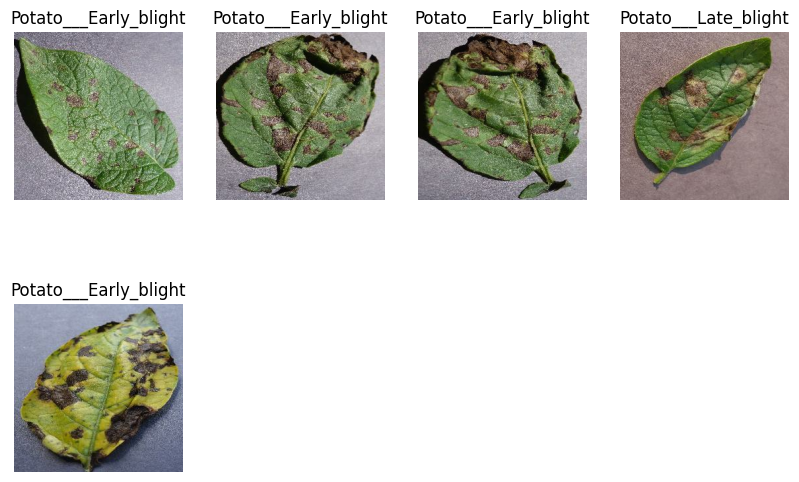

In [12]:
plt.figure(figsize=(10,10))
for i,l in df.take(1):
    for x in range(5):
        ax = plt.subplot(3,4,x+1)#This sets up a grid for plotting. Here, it creates a 3-row by 4-column grid. You might want to adjust the grid size if you only display 5 images.
        plt.imshow(i[x].numpy().astype('uint8'))#This displays the image. Converting the image to uint8 ensures it's displayed correctly.
        plt.title(cln[l[x]])
        plt.axis('off')



In [13]:
len(df)*0.8,len(df)*0.1

(54.400000000000006, 6.800000000000001)

In [14]:
train = df.take(54)
len(train)

54

In [15]:
test = df.skip(len(train))
len(test)

14

In [16]:
val = test.take(6)
len(val)

6

In [17]:
test = test.skip(6)
len(test)

8

In [18]:
len(val),len(train),len(test)

(6, 54, 8)

In [19]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

MODEL

In [20]:

resize_rescale=tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1./255),
])

In [21]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
])

In [22]:

model = models.Sequential([
    layers.InputLayer(input_shape=(256, 256, 3)),
    data_aug,
    resize_rescale,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


c:\Users\hp\Downloads\Main Python\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(train,
    batch_size=32,
    validation_data=val,
    verbose=1,
    epochs=5,
)

Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.4591 - loss: 0.9259 - val_accuracy: 0.6875 - val_loss: 0.7262
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 959ms/step - accuracy: 0.6742 - loss: 0.6882 - val_accuracy: 0.8490 - val_loss: 0.3180
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8462 - loss: 0.3698 - val_accuracy: 0.9167 - val_loss: 0.2107
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 917ms/step - accuracy: 0.9186 - loss: 0.2459 - val_accuracy: 0.9167 - val_loss: 0.2781
Epoch 5/5
 8/54 ━━━━━━━━━━━━━━━━━━━━ 44s 957ms/step - accuracy: 0.9032 - loss: 0.2919

KeyboardInterrupt: 

In [159]:
scores = model.evaluate(test)
scores


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.9360 - loss: 0.2217


[0.2443971335887909, 0.9181034564971924]